<a href="https://colab.research.google.com/github/Adjalma/Mini-Projeto-DNC/blob/main/Mini_Projeto_DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Questão de Negócio:**

Uma área específica que tem tido bastante pesquisa e investimento em torno de Machine Learning e Inteligência Artificial, é a área de imóveis. Com dados de uma região, um algoritmo pode classificar e identificar se aquele imóvel é bom ou não para comprar, auxiliando uma pessoa na examinação de um imóvel de forma que ele seja o melhor para o cliente. Não só isso, algoritmos de machine learning podem trazer novos insights na compra e venda de imóveis, ao aprender os dados e designar uma importância a cada uma das variáveis nos dados do imóvel. Portanto um dos grandes desafios é encontrar modelos e algoritmos que equilibram a precisão na compra de um imóvel. Esse estudo busca aprofundar no diagnóstico de como irenmos escolher 5 imóveis para investir e 5 imóveis que não deixariamos nosso cliente investir de modo algum.

# **O Entendimento do Negócio:**

Os dados são da ***geodacenter.github.io***, em King County - Condado de King - Washington, Estados Unidos. O Condado de King é um dos 39 condados do estado americano de Washington. A sede e cidade mais populosa do condado é Seattle. Foi fundado em 1852. Com mais de 2,2 milhões de habitantes, de acordo com o censo nacional de 2020, é o condado mais populoso do estado e o 12º mais populoso do país. O Dataset apresenta a venda de imóveis e suas características na região de Maio de 2014 à Maio de 2015. Tem um total de 21613 registros com um total de 21 atributos. Iremos buscar as ferramentas necessárias para catalogar e mostrar quais são os 5 melhores imóveis devemos investir e quais são os 5 piores imóveis a se investir de acordo com os dados recebidos.

# **A Coleta de Dados:**

Dataset: https://www.kaggle.com/harlfoxem/housesalesprediction

Dataset Detalhado: https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime as dt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import pandas as pd
import xgboost as xgb
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
from matplotlib import rcParams
import mpl_toolkits
from math import exp, log, log1p
from random import random
from IPython.display import display
from IPython.display import HTML
%matplotlib inline


# **A Limpeza de Dados:**

Carregammos nosso dataset por completo com a função do Pandas e notamos que ele possuem 21.613 registros (linhas). 

In [ ]:
#Visualizando o dataset para primeiras impressões:
kcs = pd.read_csv("/content/kc_house_data.csv")
kcs

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
# Instalando o uszipcode para adicionar uma coluna cidade ao dataset para achar a cidade de cada imóvel do dataset
!pip install uszipcode
from uszipcode import SearchEngine, SimpleZipcode

search = SearchEngine()
def zco(x):
    city = search.by_zipcode(x).major_city
    return city if city else "none"
kcs["city"] = kcs['zipcode'].apply(zco)
kcs


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.5/121.5 KB 12.9 MB/s eta 0:00:00


/usr/local/lib/python3.8/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,Seattle
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,Seattle
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,Seattle
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,Issaquah


In [ ]:
# Removendo as colunas "lat" e "long" do dataset 
kcs = kcs.drop(columns=["lat", "long"])
kcs.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,city
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,Seattle
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,Seattle
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,Kenmore
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,Seattle
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,Sammamish


# **A Exploração de Dados:**

In [ ]:
# Foram utilizados as premissas abaixo para definir as 5 merlhores casas para se investir

In [ ]:
melhores_Aguiar = kcs[(kcs["condition"]==5) & (kcs["view"]==4) & (kcs["waterfront"]>0) & (kcs["grade"] >=9) & (kcs["yr_built"] >0)]

melhores_Aguiar

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,city
6508,4217402115,20150421T000000,3650000.0,6,4.75,5480,19401,1.5,1,4,5,11,3910,1570,1936,0,98105,3510,15810,Seattle
11257,3761100045,20140618T000000,3000000.0,4,4.25,4850,12445,2.0,1,4,5,10,3850,1000,1989,0,98034,3350,12210,Kirkland
14619,7936500109,20140725T000000,2230000.0,3,3.00,3620,28064,2.0,1,4,5,10,2370,1250,1977,0,98136,2550,34713,Seattle
14682,7278100515,20140821T000000,1295000.0,2,2.50,2910,19449,2.0,1,4,5,9,1940,970,1985,0,98177,2540,23598,Seattle
19600,284000025,20150420T000000,1410000.0,2,2.00,2180,18525,1.0,1,4,5,9,1580,600,1952,0,98146,2480,21503,Seattle


In [ ]:
# Foram utilizados as premissas abaixo para definir as 5 piores casas para se investir

In [ ]:
piores_Aguiar = kcs[(kcs["condition"]==1) & (kcs["view"]==0) & (kcs["waterfront"]==0) & (kcs["grade"] <=5) & (kcs["yr_built"] <=1942)]

piores_Aguiar

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,city
36,9435300030,20140528T000000,550000.0,4,1.0,1660,34848,1.0,0,0,1,5,930,730,1933,0,98052,2160,11467,Redmond
4651,859000110,20141002T000000,125000.0,1,1.0,500,7440,1.0,0,0,1,5,500,0,1928,0,98106,1350,7440,Seattle
13628,2023049218,20140716T000000,105500.0,2,1.0,930,7740,1.0,0,0,1,5,930,0,1932,0,98148,1620,8584,Seattle
13629,2023049218,20150316T000000,445000.0,2,1.0,930,7740,1.0,0,0,1,5,930,0,1932,0,98148,1620,8584,Seattle
15293,40000362,20140506T000000,78000.0,2,1.0,780,16344,1.0,0,0,1,5,780,0,1942,0,98168,1700,10387,Seattle


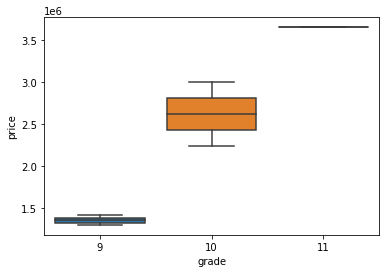

In [ ]:
sns.boxplot(data= melhores_Aguiar,x='grade', y='price');

## ***Análise final + Sugestão de imóveis ***

Os 5 melhores foram escolhidos seguindo os seguintes critérios: Foi levado em consideração a melhor Condição da casa, melhor Gral de quão belo e a vista do imóvel, o imóvel foi construído de frente para o mar, melhor classificação de material utilizado na construção, não levei em consideração o ano de construção do imóvel devido as últimas variantes serem do nível máximo deixando assim a variante ano do imóvel irrelevante seguindo os critérios que utilizei.

In [ ]:
melhores_Aguiar

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,city
6508,4217402115,20150421T000000,3650000.0,6,4.75,5480,19401,1.5,1,4,5,11,3910,1570,1936,0,98105,3510,15810,Seattle
11257,3761100045,20140618T000000,3000000.0,4,4.25,4850,12445,2.0,1,4,5,10,3850,1000,1989,0,98034,3350,12210,Kirkland
14619,7936500109,20140725T000000,2230000.0,3,3.00,3620,28064,2.0,1,4,5,10,2370,1250,1977,0,98136,2550,34713,Seattle
14682,7278100515,20140821T000000,1295000.0,2,2.50,2910,19449,2.0,1,4,5,9,1940,970,1985,0,98177,2540,23598,Seattle
19600,284000025,20150420T000000,1410000.0,2,2.00,2180,18525,1.0,1,4,5,9,1580,600,1952,0,98146,2480,21503,Seattle


Os 5 piores foram escolhidos seguindo os seguintes critérios: Foi levado em consideração a pior Condição da casa, pior vista do imóvel, o imóvel foi não foi construído de frente para o mar, pior classificação de material utilizado na construção e anos de construção anteriores a 1942.

In [ ]:
piores_Aguiar

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,city
36,9435300030,20140528T000000,550000.0,4,1.0,1660,34848,1.0,0,0,1,5,930,730,1933,0,98052,2160,11467,Redmond
4651,859000110,20141002T000000,125000.0,1,1.0,500,7440,1.0,0,0,1,5,500,0,1928,0,98106,1350,7440,Seattle
13628,2023049218,20140716T000000,105500.0,2,1.0,930,7740,1.0,0,0,1,5,930,0,1932,0,98148,1620,8584,Seattle
13629,2023049218,20150316T000000,445000.0,2,1.0,930,7740,1.0,0,0,1,5,930,0,1932,0,98148,1620,8584,Seattle
15293,40000362,20140506T000000,78000.0,2,1.0,780,16344,1.0,0,0,1,5,780,0,1942,0,98168,1700,10387,Seattle
